In [1]:
from src.dataset import CIFARDataset, iid_dataloader
from src.lenet import LeNet, weights_init
from src.train import federated_learning_experiment, train_client
from torchvision import datasets, transforms
from torch.autograd import grad
import os
import numpy as np
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
top_5_classes_indices = [0, 9, 6, 1, 8]

device = device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss().to(device)

batch_size = 50
num_clients = 5
cifar_data = CIFARDataset(batch_size=batch_size, num_clients=num_clients, top_5_classes_indices=top_5_classes_indices)
train_dataset, validation_dataset, user_groups = cifar_data.get_dataset()

alpha = 1

train_subset_size = int(alpha * len(train_dataset))
validation_subset_size = int(alpha * len(validation_dataset))

train_dataset = torch.utils.data.Subset(train_dataset, indices=range(train_subset_size))
validation_dataset = torch.utils.data.Subset(validation_dataset, indices=range(validation_subset_size))

iid_client_train_loader = iid_dataloader(train_dataset, batch_size=batch_size, num_clients=num_clients)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

#initialize the global model for the non-pruning experiment
global_model_non_pruning = LeNet().to(device)
global_model_non_pruning.apply(weights_init)

#initialize the global model for the pruning experiment
global_model_pruning = LeNet().to(device)
global_model_pruning.apply(weights_init)

Files already downloaded and verified
Files already downloaded and verified


LeNet(
  (body): Sequential(
    (0): Conv2d(3, 12, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): Sigmoid()
    (2): Conv2d(12, 12, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): Sigmoid()
    (4): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): Sigmoid()
  )
  (fc): Sequential(
    (0): Linear(in_features=768, out_features=10, bias=True)
  )
)

# Run experiment without pruning

Round 0 is starting
Clients for round 0 are: [2 3]
round 0, starting client 1/2, id: 2


Client 2, epoch 0, reconstruction performance using iDLG:


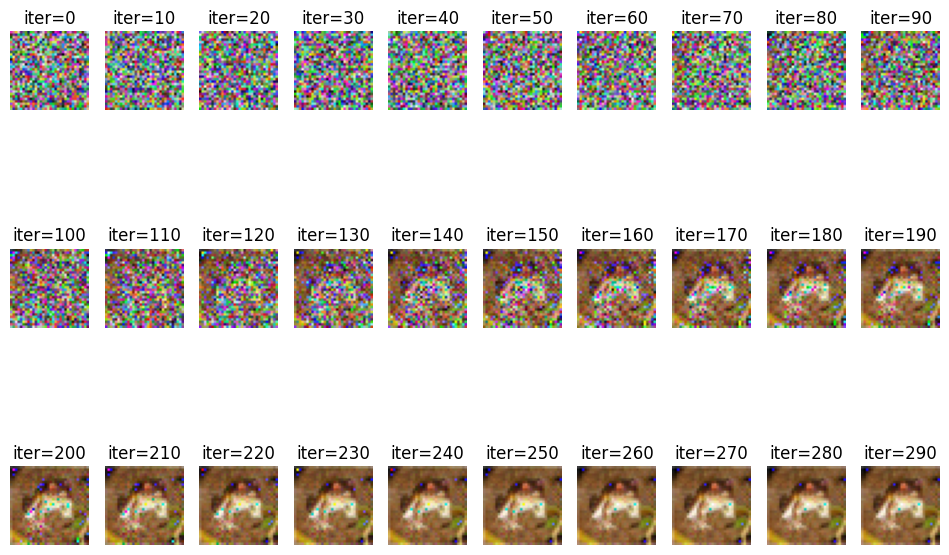



Client 2, epoch 1, reconstruction performance using iDLG:


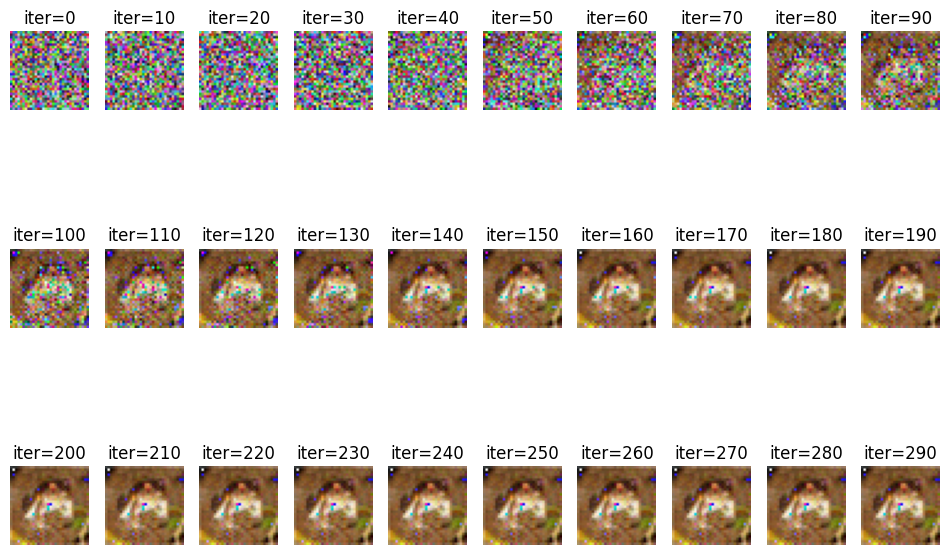

round 0, starting client 2/2, id: 3


Client 3, epoch 0, reconstruction performance using iDLG:


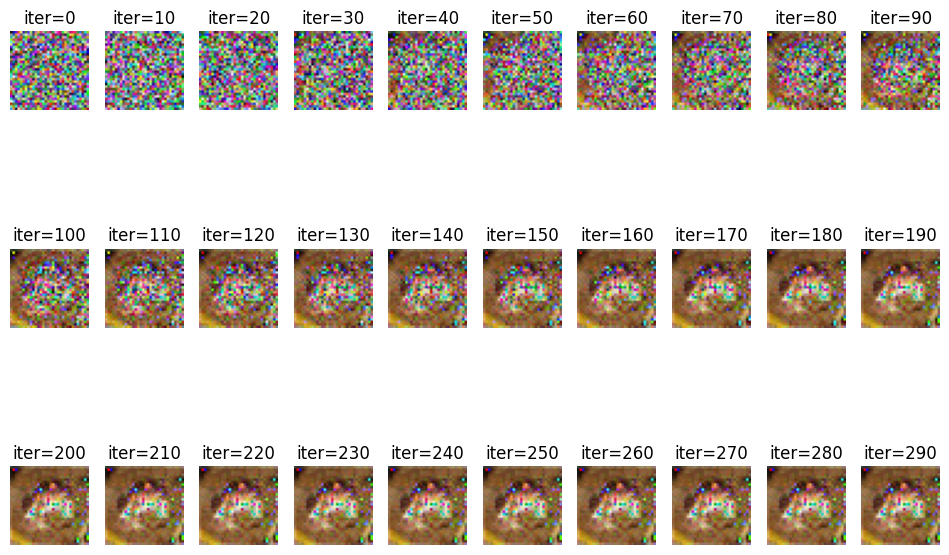



Client 3, epoch 1, reconstruction performance using iDLG:


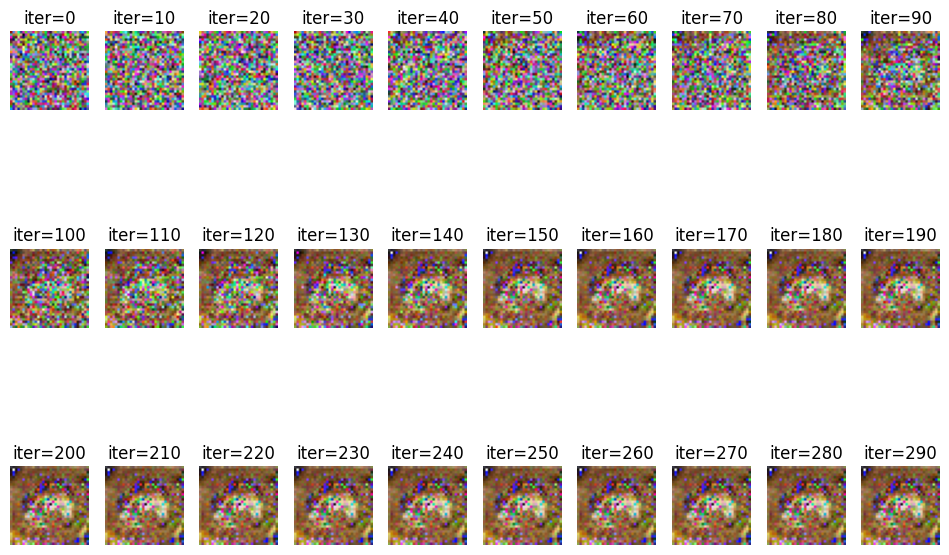

Round 0, validation accuracy: 44.28 %
Round 1 is starting
Clients for round 1 are: [0 1]
round 1, starting client 1/2, id: 0


/home/mark/Desktop/Bachelor_Project/GradientPruningInFL/BachProject/lib/python3.10/site-packages/torchvision/transforms/functional.py:281: RuntimeWarning: invalid value encountered in cast
  npimg = (npimg * 255).astype(np.uint8)




Client 0, epoch 0, reconstruction performance using iDLG:


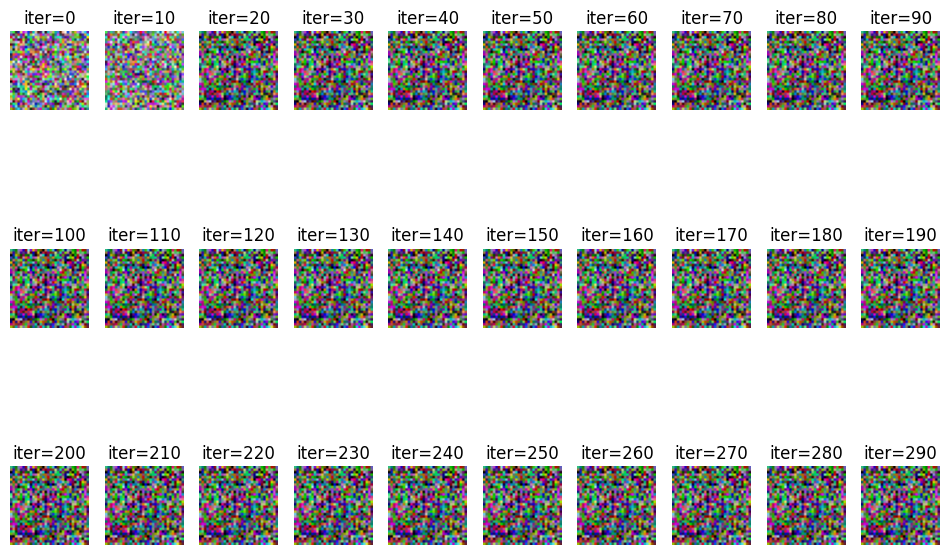



Client 0, epoch 1, reconstruction performance using iDLG:


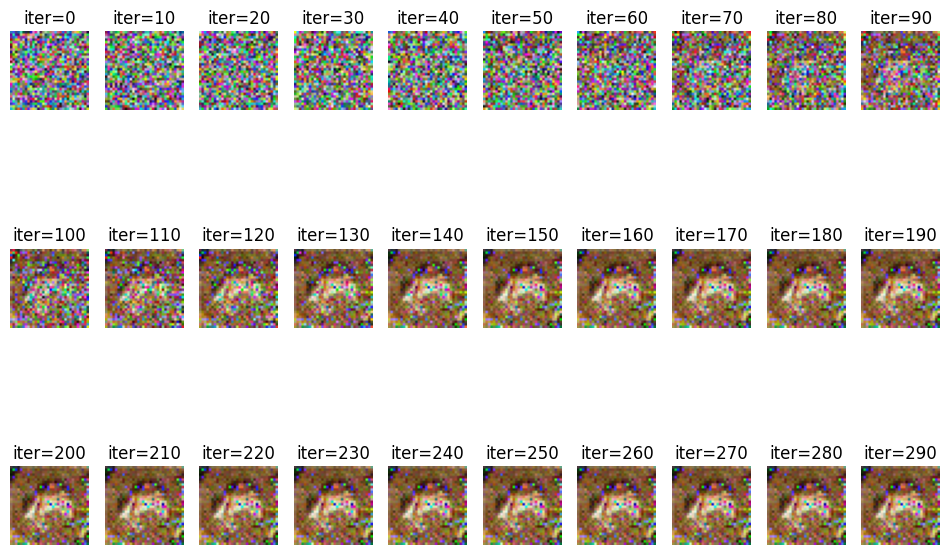

round 1, starting client 2/2, id: 1


Client 1, epoch 0, reconstruction performance using iDLG:


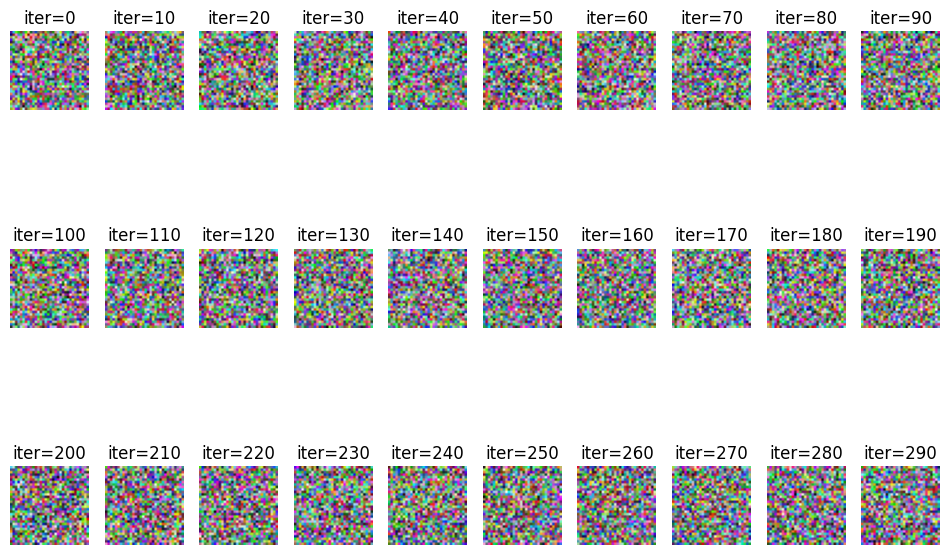



Client 1, epoch 1, reconstruction performance using iDLG:


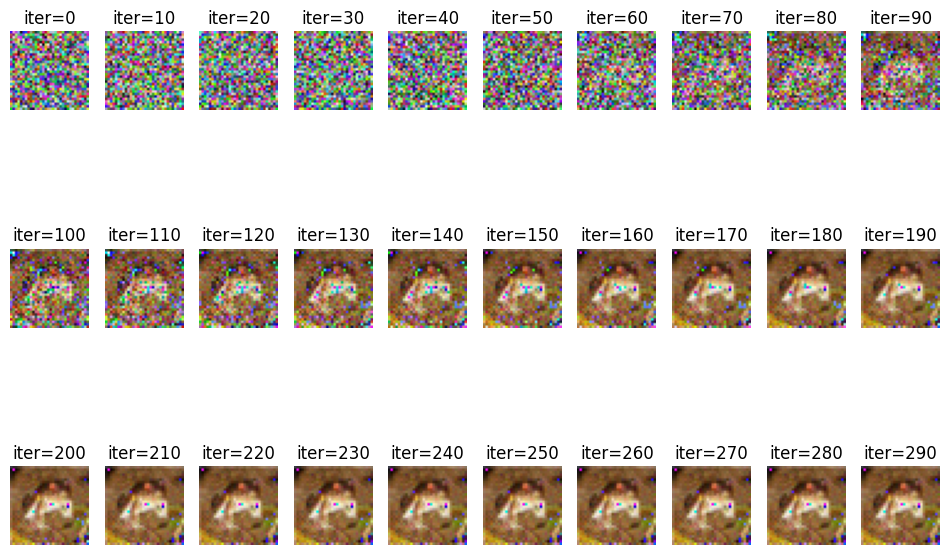

Round 1, validation accuracy: 58.86 %


In [3]:
results_without_pruning = federated_learning_experiment(
    global_model_non_pruning, num_clients_per_round=2, num_local_epochs=2, lr=5e-3,
    client_train_loader=iid_client_train_loader, max_rounds=2, device=device,
    criterion=criterion, test_dataloader=validation_loader, filtered_train_dataset=train_dataset,
    prune=False
)

# Run experiment with pruning

Round 0 is starting
Clients for round 0 are: [4 3]
round 0, starting client 1/2, id: 4


Client 4, epoch 0, reconstruction performance using iDLG:


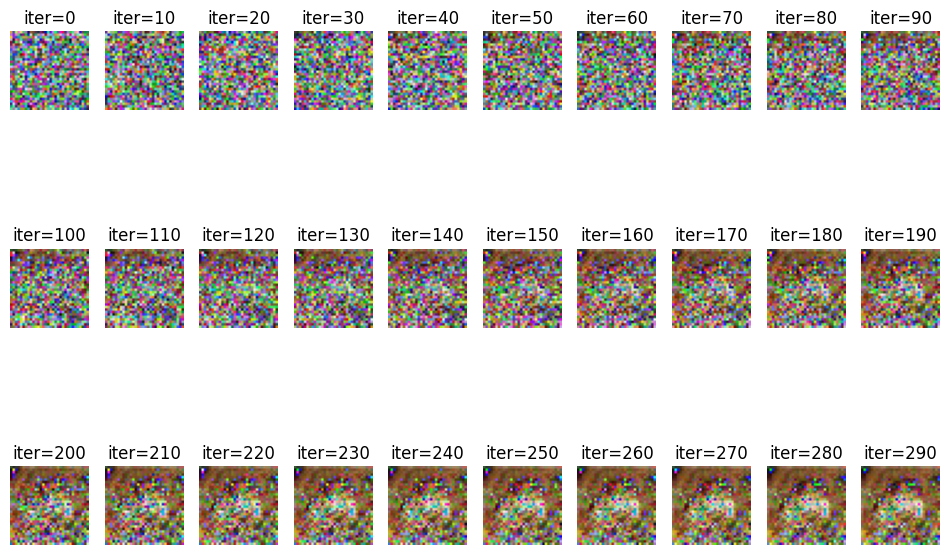



Client 4, epoch 1, reconstruction performance using iDLG:


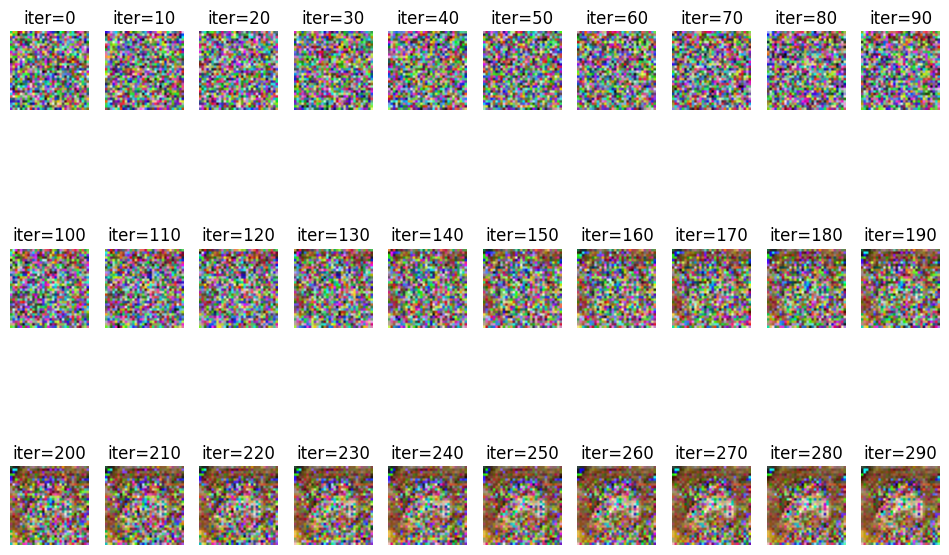

round 0, starting client 2/2, id: 3


Client 3, epoch 0, reconstruction performance using iDLG:


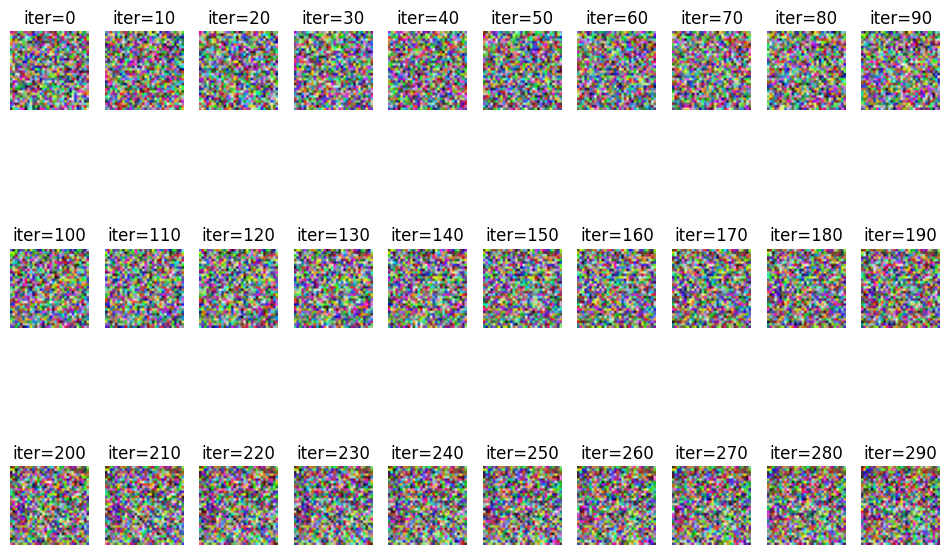



Client 3, epoch 1, reconstruction performance using iDLG:


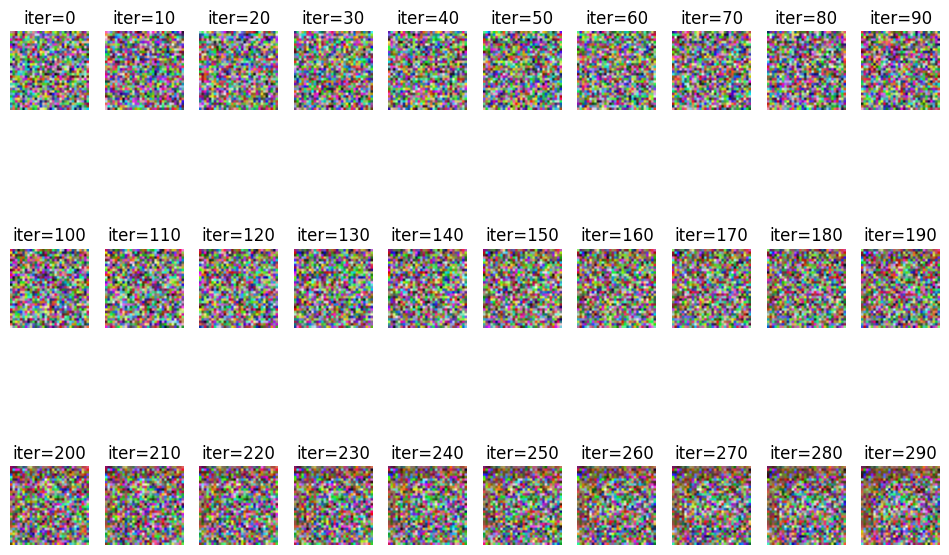

Round 0, validation accuracy: 42.26 %
Round 1 is starting
Clients for round 1 are: [0 2]
round 1, starting client 1/2, id: 0


Client 0, epoch 0, reconstruction performance using iDLG:


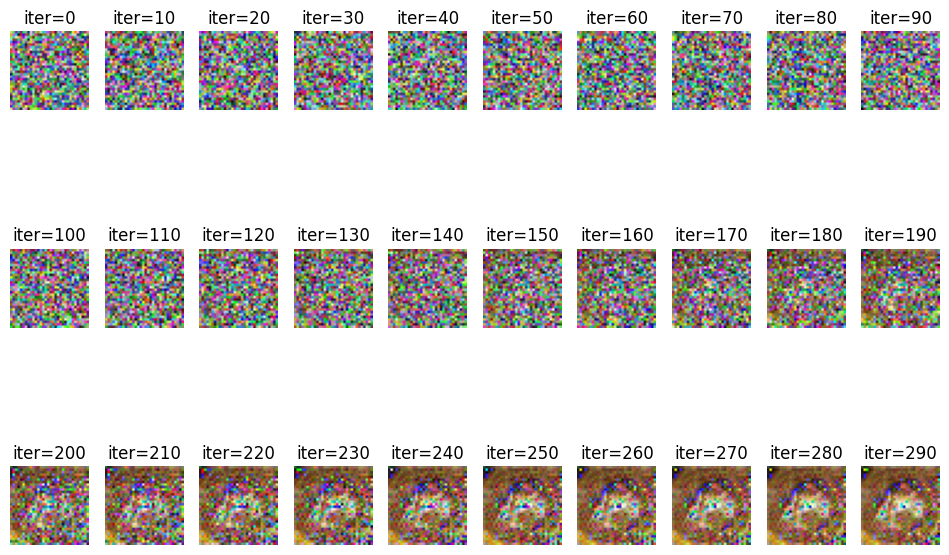



Client 0, epoch 1, reconstruction performance using iDLG:


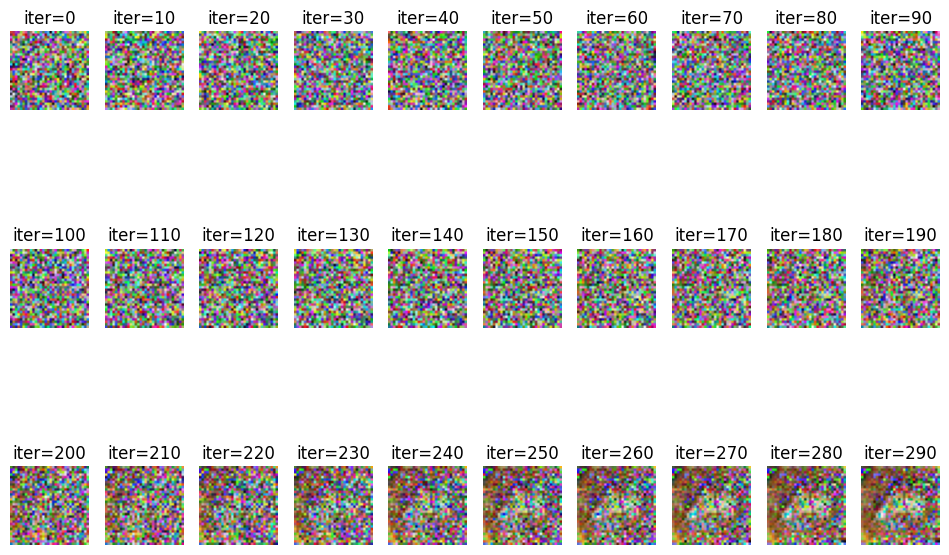

round 1, starting client 2/2, id: 2


Client 2, epoch 0, reconstruction performance using iDLG:


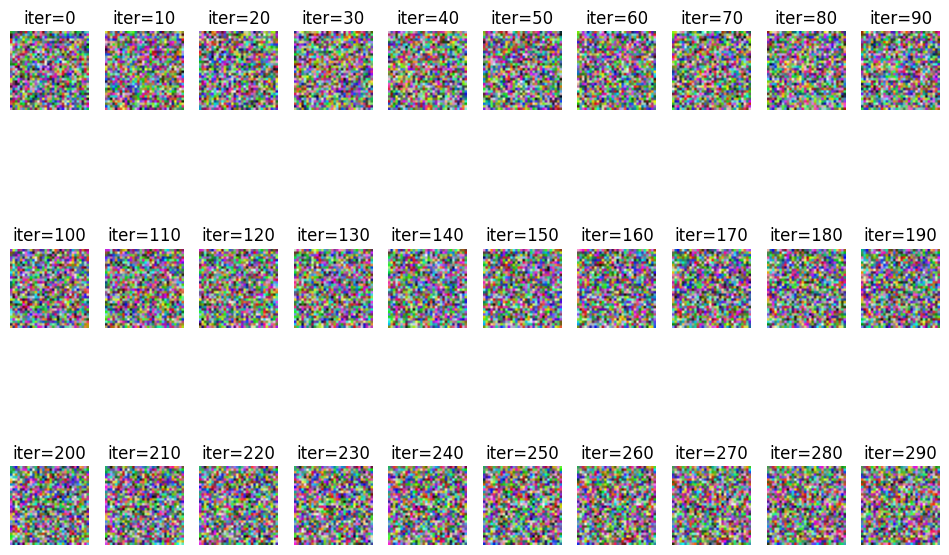



Client 2, epoch 1, reconstruction performance using iDLG:


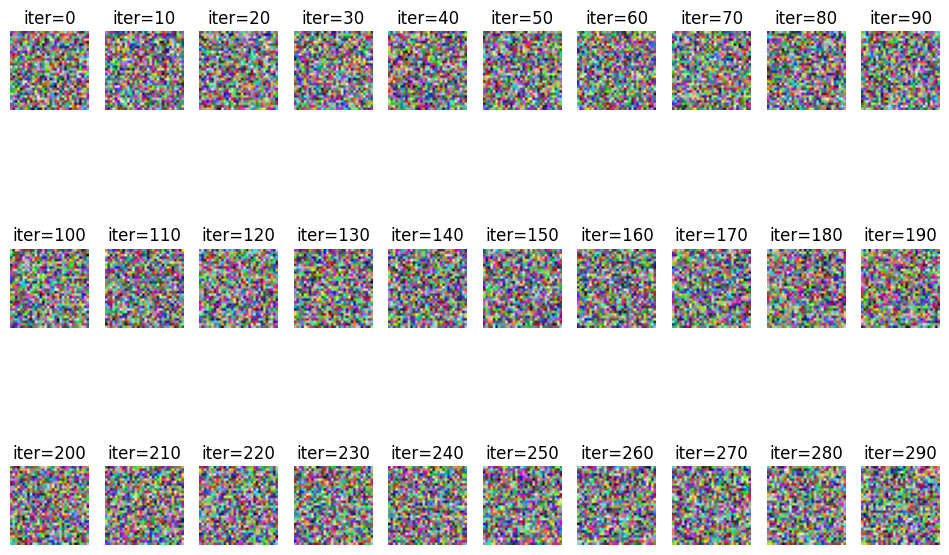

Round 1, validation accuracy: 56.98 %


In [3]:
results_without_pruning = federated_learning_experiment(
    global_model_pruning, num_clients_per_round=2, num_local_epochs=2, lr=5e-3,
    client_train_loader=iid_client_train_loader, max_rounds=2, device=device,
    criterion=criterion, test_dataloader=validation_loader, filtered_train_dataset=train_dataset,
    prune=True
)